In [2]:
from pyexpat import model
import requests
import time
import pandas as pd, numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime as dt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit, train_test_split, KFold

import lightgbm as lgb
from skopt import BayesSearchCV
from lightgbm import early_stopping
from lightgbm import log_evaluation
from lightgbm import LGBMRegressor
#import optuna
#import optuna.integration.lightgbm as lgb_tune
#import optuna.integration.lightgbm as optuna_lgb
from sklearn.model_selection import KFold

#from skopt.space import Real, Categorical, Integer

In [3]:
prices = pd.read_csv("./data/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv")

average = pd.DataFrame(prices.groupby("SecuritiesCode").Target.mean())
def get_avg(_id_):
    return average.loc[_id_]
prices["Avg"] = prices["SecuritiesCode"].apply(get_avg)

prices.Date = pd.to_datetime(prices.Date)
prices['Date'] = prices['Date'].dt.strftime("%Y%m%d").astype(int)

In [4]:
X=prices[["Date","SecuritiesCode","Open", "High", "Low", "Close", "Volume", "Avg",]]
y=prices[["Target"]]

In [8]:
X.head()

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Avg
0,20211206,1301,2982.0,2982.0,2965.0,2971.0,8900,0.000968
1,20211206,1332,592.0,599.0,588.0,589.0,1360800,-0.000949
2,20211206,1333,2368.0,2388.0,2360.0,2377.0,125900,0.000273
3,20211206,1375,1230.0,1239.0,1224.0,1224.0,81100,-0.000788
4,20211206,1376,1339.0,1372.0,1339.0,1351.0,6200,0.001423


In [9]:
y.head()

,Target
0,-0.003263
1,-0.008993
2,-0.009963
3,-0.015032
4,0.002867


In [5]:
model2=LGBMRegressor(num_leaves=500, learning_rate=0.1, n_estimators=300)
model2.fit(X,y)
r2_2 = model2.score(X,y)
print(f'R2(date=datetime){r2_2}:')

R2(date=datetime)0.750679766373988:


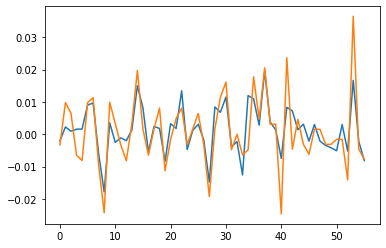

In [7]:
plt.plot(model2.predict(X[X.SecuritiesCode == 1301]))
plt.plot(np.array(prices[prices.SecuritiesCode == 1301].Target))

In [19]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 567 kB 9.7 MB/s eta 0:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 0.87.0 requires click<8.0,>=7.0, but you have click 8.1.3 which is incompatible.
You should consider upgrading via the '/usr/local/pyenv/versions/3.9.1/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

import shap

In [ ]:
shap.initjs()

explainer_rf = shap.TreeExplainer(model=model2, model_output='raw')

In [ ]:
shap_values_rf = explainer_rf.shap_values(X=X)

In [ ]:
# rfの特徴量の重要度
shap.initjs()
shap.summary_plot(shap_values_rf, X, plot_type="bar")

In [ ]:
# rfのforce_plot(shapley値と特徴変数の寄与度)
shap.initjs()
shap.force_plot(base_value=explainer_rf.expected_value, shap_values=shap_values_rf, features=X)